### Test the difference in the BC distribution between all lncRNAs and essential lncRNAs.

#### human

all lncRNA genes

Zero score ratio: 0.27112715998033804


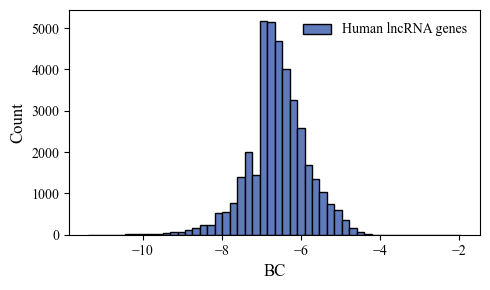

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# ====== 1) read CSV ======
csv_path = "BC_score_human.csv"
df = pd.read_csv(csv_path, header=0)

df.columns = ["lncRNA", "score"]

# ====== 2) Clean data ======

# Convert to numeric and drop invalid values
df["score"] = pd.to_numeric(df["score"], errors="coerce")
df = df.dropna(subset=["score"])

# Print the ratio of zero scores
print("Zero score ratio:", len(df[df["score"] == 0]) / len(df))

# Remove non-positive scores (log10 requires >0)
df = df[df["score"] > 0]

scores = df["score"].values
log_scores = np.log10(scores)

# ====== 3) Plot histogram of log10-transformed scores ======
plt.figure(figsize=(5, 3))

plt.hist(log_scores, bins=50, edgecolor="black", color="#607bbc", label="Human lncRNA genes")

plt.legend(
    loc="upper right",
    fontsize=10,
    frameon=False
)

plt.xlabel("BC", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.savefig("human_BC.svg")



essential lncRNA genes

[heart] Zero score ratio: 0.06049978079789566


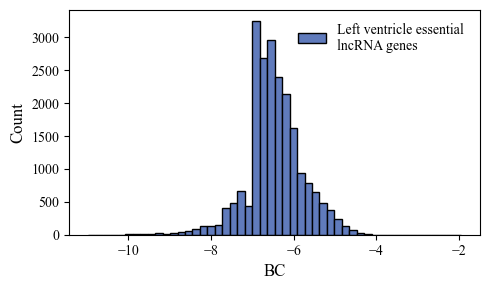

[lung] Zero score ratio: 0.10786156134993344


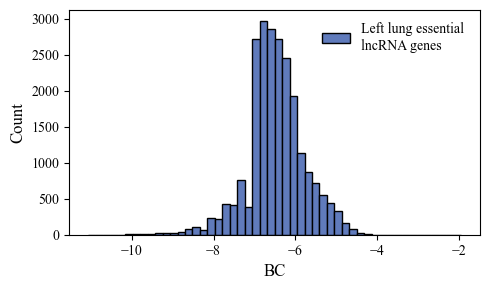

[stomach] Zero score ratio: 0.05600539811066127


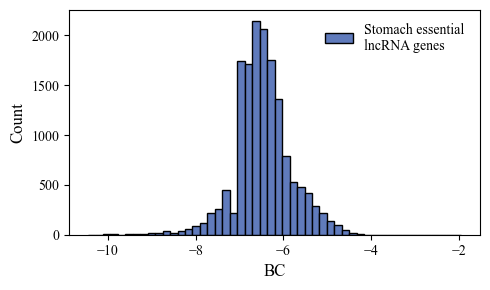

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# Map tissue aliases to full names
tissue_name_map = {
    "heart": "Left ventricle",
    "lung": "Left lung",
    "stomach": "Stomach"
}

# ====== 1) read CSV ======
csv_path = "BC_score_human.csv"  
df_bc = pd.read_csv(csv_path, header=0)  
df_bc.columns = ["lncRNA", "score"]

for t in ["heart", "lung", "stomach"]:

    # Get full tissue name for legend
    full_t = tissue_name_map.get(t, t)

    ess_df = pd.read_csv(f"./deduplicated_human_{t}_essential_genes.csv", header=None)
    ess_df.columns = ['lncRNA_id']

    # ====== 2) Clean data ======
    df = df_bc[df_bc['lncRNA'].isin(ess_df['lncRNA_id'])].copy()

    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score"])

    print(f"[{t}] Zero score ratio:", len(df[df["score"] == 0]) / len(df))

    df = df[df["score"] > 0]

    scores = df["score"].values
    log_scores = np.log10(scores)

    # ====== 3) Plot histogram ======
    plt.figure(figsize=(5, 3))

    plt.hist(
        log_scores,
        bins=50,
        edgecolor="black",
        color="#607bbc",
        label=f"{full_t} essential \nlncRNA genes"
    )

    plt.legend(loc="upper right", fontsize=10, frameon=False)

    plt.xlabel("BC", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    plt.tight_layout()
    plt.savefig(f"human_ess_BC_{t}.svg")
    plt.show()


#### mouse

all lncRNA genes

Zero score ratio: 0.45112484157160965


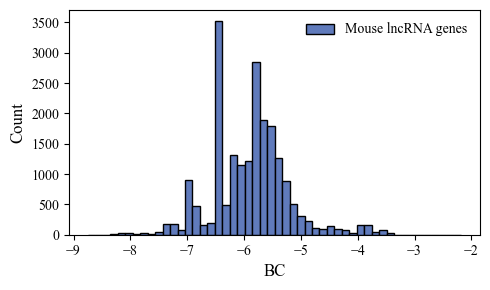

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# ====== 1) read CSV ======
csv_path = "BC_score_mouse.csv"
df = pd.read_csv(csv_path, header=0)

df.columns = ["lncRNA", "score"]

# ====== 2) Clean data ======

# Convert to numeric and drop invalid values
df["score"] = pd.to_numeric(df["score"], errors="coerce")
df = df.dropna(subset=["score"])

# Print the ratio of zero scores
print("Zero score ratio:", len(df[df["score"] == 0]) / len(df))

# Remove non-positive scores (log10 requires >0)
df = df[df["score"] > 0]

scores = df["score"].values
log_scores = np.log10(scores)

# ====== 3) Plot histogram of log10-transformed scores ======
plt.figure(figsize=(5, 3))

plt.hist(log_scores, bins=50, edgecolor="black", color="#607bbc", label="Mouse lncRNA genes")

plt.legend(
    loc="upper right",
    fontsize=10,
    frameon=False
)

plt.xlabel("BC", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.tight_layout()
plt.savefig("mouse_BC.svg")



essential lncRNA genes

[heart] Zero score ratio: 0.31993481803367735


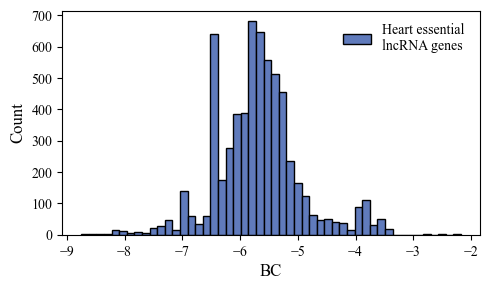

[lung] Zero score ratio: 0.3196408100878869


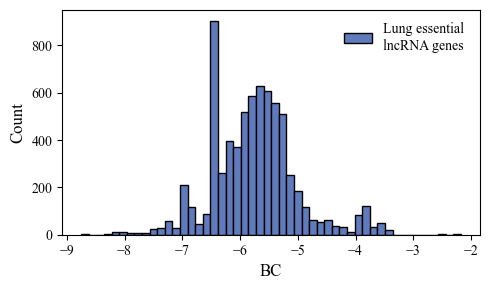

[brain] Zero score ratio: 0.35962296816389344


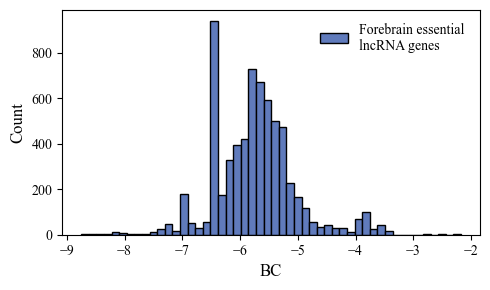

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.family'] = 'Times New Roman'

# Map tissue aliases to full names
tissue_name_map = {
    "heart": "Heart",
    "lung": "Lung",
    "brain": "Forebrain"
}

# ====== 1) read CSV ======
csv_path = "BC_score_mouse.csv"  
df_bc = pd.read_csv(csv_path, header=0)  
df_bc.columns = ["lncRNA", "score"]

for t in ["heart", "lung", "brain"]:

    # Get full tissue name for legend
    full_t = tissue_name_map.get(t, t)

    ess_df = pd.read_csv(f"./deduplicated_mouse_{t}_essential_genes.csv", header=None)
    ess_df.columns = ['lncRNA_id']

    # ====== 2) Clean data ======
    df = df_bc[df_bc['lncRNA'].isin(ess_df['lncRNA_id'])].copy()

    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score"])

    print(f"[{t}] Zero score ratio:", len(df[df["score"] == 0]) / len(df))

    df = df[df["score"] > 0]

    scores = df["score"].values
    log_scores = np.log10(scores)

    # ====== 3) Plot histogram ======
    plt.figure(figsize=(5, 3))

    plt.hist(
        log_scores,
        bins=50,
        edgecolor="black",
        color="#607bbc",
        label=f"{full_t} essential \nlncRNA genes"
    )

    plt.legend(loc="upper right", fontsize=10, frameon=False)

    plt.xlabel("BC", fontsize=12)
    plt.ylabel("Count", fontsize=12)

    plt.tight_layout()
    plt.savefig(f"mouse_ess_BC_{t}.svg")
    plt.show()


### Filter the deduplicated lncRNAs using BC.

#### human

In [ ]:
import pandas as pd
import numpy as np
import os

species = "human"
csv_path = "BC_score_human.csv"
k=30

# Output directory (create if not exists)
out_dir = f"./filtered/{species}"
os.makedirs(out_dir, exist_ok=True)

# ====== 1) Read BC score CSV ======
# The file should contain columns: lncRNA, score
df_raw = pd.read_csv(csv_path, header=0)

threshold_records = []

# Loop through tissues
for tissue in ['heart', 'lung', 'stomach']:

    # ====== 2) Read the deduplicated essential lncRNA list for this tissue ======
    ess_df = pd.read_csv(f"./deduplicated_{species}_{tissue}_essential_genes.csv", header=None)
    ess_df.columns = ['lncRNA_id']

    # ====== 3) Filter BC score table by essential lncRNAs ======
    df = df_raw.copy()
    df = df[df['lncRNA'].isin(ess_df['lncRNA_id'])]

    # Convert score to numeric and drop invalid values
    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score"])

    # ====== 4) Compute BC threshold using the 80th percentile (top 20%) ======
    # This means we keep genes whose BC score is within the highest 20%
    bc_threshold = df["score"].quantile(1-k/100)

    # ====== 5) Filter genes above the threshold and sort descending ======
    df_top = df[df["score"] >= bc_threshold].sort_values(by="score", ascending=False).copy()

    # ====== 6) Save filtered lncRNA IDs (no header, one ID per line) ======
    out_path = os.path.join(out_dir, f"BC_top{k}pct_{species}_{tissue}_esslnc.csv")
    df_top[['lncRNA']].to_csv(out_path, header=None, index=False)

    # ====== 7) Record threshold summary ======
    threshold_records.append({
        "tissue": tissue,
        "total_essential_with_score": len(df),
        f"retained_top{k}pct": len(df_top),
        "percent_retained": len(df_top) / len(df) * 100 if len(df) > 0 else 0,
        "BC_threshold_80th_percentile": bc_threshold
    })

    print(f"[{tissue}] total essential (with score) = {len(df)}, retained = {len(df_top)} "
          f"({len(df_top)/len(df)*100:.2f}%)")
    print(f"    ✅ BC threshold  = {bc_threshold:.6g}")
    print(f"    Saved to: {out_path}\n")

# ====== 8) Save threshold summary to CSV ======
threshold_df = pd.DataFrame(threshold_records)
threshold_summary_path = os.path.join(out_dir, f"BC_threshold_summary_top{k}pct_{species}.csv")
threshold_df.to_csv(threshold_summary_path, index=False)

print(f"✅ Threshold summary saved to: {threshold_summary_path}")


[heart] total essential (with score) = 22810, retained = 9124 (40.00%)
    ✅ BC threshold (80th percentile) = 3.95347e-07
    Saved to: ./filtered/human/BC_top40pct_human_heart_esslnc.csv

[lung] total essential (with score) = 25542, retained = 10217 (40.00%)
    ✅ BC threshold (80th percentile) = 3.62266e-07
    Saved to: ./filtered/human/BC_top40pct_human_lung_esslnc.csv

[stomach] total essential (with score) = 16302, retained = 6521 (40.00%)
    ✅ BC threshold (80th percentile) = 3.93506e-07
    Saved to: ./filtered/human/BC_top40pct_human_stomach_esslnc.csv

✅ Threshold summary saved to: ./filtered/human/BC_threshold_summary_top40pct_human.csv


#### mouse

In [61]:
import pandas as pd
import numpy as np
import os

species = "mouse"
csv_path = "BC_score_mouse.csv"
k=50

# Output directory (create if not exists)
out_dir = f"./filtered/{species}"
os.makedirs(out_dir, exist_ok=True)

# ====== 1) Read BC score CSV ======
# The file should contain columns: lncRNA, score
df_raw = pd.read_csv(csv_path, header=0)

threshold_records = []

# Loop through tissues
for tissue in ['heart', 'lung', 'brain']:

    # ====== 2) Read the deduplicated essential lncRNA list for this tissue ======
    ess_df = pd.read_csv(f"./deduplicated_{species}_{tissue}_essential_genes.csv", header=None)
    ess_df.columns = ['lncRNA_id']

    # ====== 3) Filter BC score table by essential lncRNAs ======
    df = df_raw.copy()
    df = df[df['lncRNA'].isin(ess_df['lncRNA_id'])]

    # Convert score to numeric and drop invalid values
    df["score"] = pd.to_numeric(df["score"], errors="coerce")
    df = df.dropna(subset=["score"])

    # ====== 4) Compute BC threshold using the 80th percentile (top 20%) ======
    # This means we keep genes whose BC score is within the highest 20%
    bc_threshold = df["score"].quantile(1-k/100)

    # ====== 5) Filter genes above the threshold and sort descending ======
    df_top = df[df["score"] >= bc_threshold].sort_values(by="score", ascending=False).copy()

    # ====== 6) Save filtered lncRNA IDs (no header, one ID per line) ======
    out_path = os.path.join(out_dir, f"BC_top{k}pct_{species}_{tissue}_esslnc.csv")
    df_top[['lncRNA']].to_csv(out_path, header=None, index=False)

    # ====== 7) Record threshold summary ======
    threshold_records.append({
        "tissue": tissue,
        "total_essential_with_score": len(df),
        f"retained_top{k}pct": len(df_top),
        "percent_retained": len(df_top) / len(df) * 100 if len(df) > 0 else 0,
        "BC_threshold_80th_percentile": bc_threshold
    })

    print(f"[{tissue}] total essential (with score) = {len(df)}, retained = {len(df_top)} "
          f"({len(df_top)/len(df)*100:.2f}%)")
    print(f"    ✅ BC threshold (80th percentile) = {bc_threshold:.6g}")
    print(f"    Saved to: {out_path}\n")

# ====== 8) Save threshold summary to CSV ======
threshold_df = pd.DataFrame(threshold_records)
threshold_summary_path = os.path.join(out_dir, f"BC_threshold_summary_top{k}pct_{species}.csv")
threshold_df.to_csv(threshold_summary_path, index=False)

print(f"✅ Threshold summary saved to: {threshold_summary_path}")


[heart] total essential (with score) = 9205, retained = 4660 (50.62%)
    ✅ BC threshold (80th percentile) = 8.08086e-07
    Saved to: ./filtered/mouse/BC_top50pct_mouse_heart_esslnc.csv

[lung] total essential (with score) = 10468, retained = 5301 (50.64%)
    ✅ BC threshold (80th percentile) = 5.6602e-07
    Saved to: ./filtered/mouse/BC_top50pct_mouse_lung_esslnc.csv

[brain] total essential (with score) = 10397, retained = 5201 (50.02%)
    ✅ BC threshold (80th percentile) = 4.75569e-07
    Saved to: ./filtered/mouse/BC_top50pct_mouse_brain_esslnc.csv

✅ Threshold summary saved to: ./filtered/mouse/BC_threshold_summary_top50pct_mouse.csv


### Obtain the intersection of essential genes across the three tissues.

#### human

In [53]:
import pandas as pd

species = "human"
tissues = ["heart", "lung", "stomach"]
k=30

files = [
    f"./filtered/{species}/BC_top{k}pct_{species}_{t}_esslnc.csv" for t in tissues
]

def load_gene_list(path):

    df = pd.read_csv(path, header=None)
    gene_col = df.columns[0]
    genes = df[gene_col].dropna().astype(str).str.strip().unique()
    return set(genes)

gene_sets = [load_gene_list(f) for f in files]

# get intersection
common_genes = set.intersection(*gene_sets)

# save
out_path = f"./filtered/{species}/common_essential_genes_{species}.csv"
pd.DataFrame(sorted(common_genes)).to_csv(out_path, index=False,header=None)

print("✅ Intersection completed!")
print(f"Common genes count: {len(common_genes)}")
print(f"Saved to: {out_path}")


✅ Intersection completed!
Common genes count: 4395
Saved to: ./filtered/human/common_essential_genes_human.csv


#### mouse

In [62]:
import pandas as pd

species = "mouse"
tissues = ["heart", "lung", "brain"]
k=50

files = [
    f"./filtered/{species}/BC_top{k}pct_{species}_{t}_esslnc.csv" for t in tissues
]

def load_gene_list(path):

    df = pd.read_csv(path, header=None)
    gene_col = df.columns[0]
    genes = df[gene_col].dropna().astype(str).str.strip().unique()
    return set(genes)

gene_sets = [load_gene_list(f) for f in files]

# get intersection
common_genes = set.intersection(*gene_sets)

# save
out_path = f"./filtered/{species}/common_essential_genes_{species}.csv"
pd.DataFrame(sorted(common_genes)).to_csv(out_path, index=False,header=None)

print("✅ Intersection completed!")
print(f"Common genes count: {len(common_genes)}")
print(f"Saved to: {out_path}")


✅ Intersection completed!
Common genes count: 3018
Saved to: ./filtered/mouse/common_essential_genes_mouse.csv
